
1. Implement K-Nearest Neighbor classifier on the heart disease dataset and analyze the performance using accuracy, while varying the number of neighbors (e.g. 1 – 250). Also print the neighbor(s) having the highest accuracy and those with the lowest accuracy.

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [135]:
df.groupby('sex').size()


,0
sex,
0,312
1,713


In [136]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [137]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [138]:
print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

X_train:       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
491   57    1   2       150   168    0        1      174      0      1.6   
356   59    1   0       164   176    1        0       90      0      1.0   
10    71    0   0       112   149    0        1      125      0      1.6   
105   47    1   0       110   275    0        0      118      1      1.0   
68    37    0   2       120   215    0        1      170      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
835   49    1   2       118   149    0        0      126      0      0.8   
192   67    0   2       115   564    0        0      160      0      1.6   
629   65    1   3       138   282    1        0      174      0      1.4   
559   67    1   0       120   237    0        1       71      0      1.0   
684   60    1   2       140   185    0        0      155      0      3.0   

     slope  ca  thal  target  
491      2   0     2       1  
356      1   2 

In [139]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 14)
(308, 14)
(717,)
(308,)


In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [141]:
predictions = knn.predict(X_test)

In [142]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.99      0.99       210

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Choosing a K Value

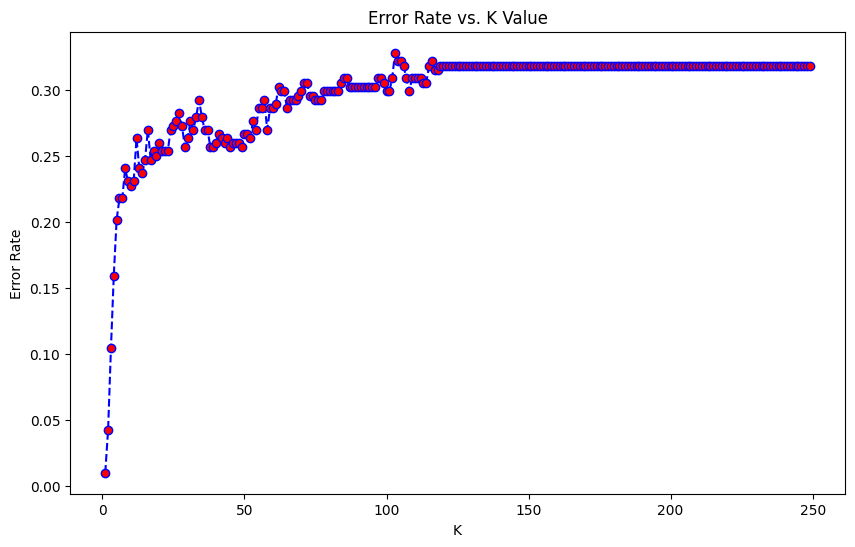

In [144]:
error_rate = []
for i in range(1, 250):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,250),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=103)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.672077922077922



Q2: Run the above provided KNN Algorithm for different random seed values from 1 to 10.
Print all accuracies and then print the highest and the lowest.

In [146]:
accuracies  = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=i)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy for seed {i}: {accuracy:.2f}')
    accuracies.append(accuracy)

print(f'Highest accuracy: {max(accuracies):.2f}')
print(f'Lowest accuracy: {min(accuracies):.2f}')



Accuracy for seed 1: 0.79
Accuracy for seed 2: 0.76
Accuracy for seed 3: 0.74
Accuracy for seed 4: 0.81
Accuracy for seed 5: 0.78
Accuracy for seed 6: 0.76
Accuracy for seed 7: 0.77
Accuracy for seed 8: 0.79
Accuracy for seed 9: 0.80
Accuracy for seed 10: 0.72
Highest accuracy: 0.81
Lowest accuracy: 0.72
